## 1-2. 量子ビットに対する基本演算

量子ビットについて理解が深まったところで、次に量子ビットに対する演算がどのように表されるかについて見ていこう。
これには、量子力学の性質が深く関わっている。

1. 線型性：   
詳しくは第4章で学ぶのだが、量子力学では状態（量子ビット）の時間変化はつねに（状態の重ね合わせに対して）線型になっている。つまり、**量子コンピュータ上で許された操作は状態ベクトルに対する線型変換**ということになる
。１つの量子ビットの量子状態は規格化された２次元複素ベクトルとして表現されるのだったから、
１つの量子ビットに対する操作＝線型演算は**$2 \times 2$の複素行列**によって表現される。

2. ユニタリ性：   
さらに、確率の合計は常に1であるという規格化条件から、量子操作に表す線形演算（量子演算）に対してさらなる制限を導くことができる。まず、各測定結果を得る確率は複素確率振幅の絶対値の2乗で与えられるので、その合計は状態ベクトルの（自分自身との）内積と一致することに注目する:
$$
|\alpha|^2 + |\beta|^2 =
(\alpha^*, \beta^*)
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1.
$$
（アスタリスク $^*$ は複素共役を表す）   
 量子コンピュータで操作した後の状態は、量子演算に対応する線形変換(行列)を$U$とすると、
$$
U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$
と書ける。この状態についても上記の規格化条件が成り立つ必要があるので、
$$
(\alpha^*, \beta^*)
U^\dagger U
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right) = 1
$$
が要請される。（ダガー $^\dagger$ は行列の転置と複素共役を両方適用したものを表し、エルミート共役という）

 この関係式が任意の$\alpha$, $\beta$について成り立つ必要があるので、量子演算$U$は以下の条件を満たす**ユニタリー行列**に対応する:
$$
U^{\dagger} U = U U^{\dagger} = I.
$$

すなわち、**量子ビットに対する操作は、ユニタリー行列で表される**のである。

ここで、用語を整理しておく。量子力学では、状態ベクトルに対する線形変換のことを**演算子** (operator) と呼ぶ。単に演算子という場合は、ユニタリーとは限らない任意の線形変換を指す。それに対して、上記のユニタリー性を満たす線形変換のことを**量子演算** (quantum gate) と呼ぶ。量子演算は、量子状態に対する演算子のうち、（少なくとも理論的には）**物理的に実現可能なもの**と考えることができる。

### １量子ビット演算の例：パウリ演算子
１つの量子ビットに作用する基本的な量子演算として**パウリ演算子**を導入する。
これは量子コンピュータを学んでいく上で最も重要な演算子であるので、定義を体に染み込ませておこう。
$$
\begin{eqnarray}
I&=&
\left(\begin{array}{cc}
1 & 0
\\
0 & 1
\end{array}
\right),\;\;\;
X=
\left(\begin{array}{cc}
0 & 1
\\
1 & 0
\end{array}
\right),\;\;\;
Y &=&
\left(\begin{array}{cc}
0 & -i
\\
i & 0
\end{array}
\right),\;\;\;
Z=
\left(\begin{array}{cc}
1 & 0
\\
0 & -1
\end{array}
\right).
\end{eqnarray}
$$

各演算子のイメージを説明する。

まず、$I$は恒等演算子で、要するに「何もしない」ことを表す。

$X$は古典ビットの反転（NOT）に対応し
$$X|0\rangle = |1\rangle, \;\;
X|1\rangle = |0\rangle
$$
のように作用する。（※ブラケット表記を用いた。下記コラムも参照。）

$Z$演算子は$|0\rangle$と$|1\rangle$の位相を反転させる操作で、
$$
Z|0\rangle = |0\rangle, \;\;
Z|1\rangle = -|1\rangle
$$
と作用する。
これは$|0\rangle$と$|1\rangle$の重ね合わせの「位相」という情報を保持できる量子コンピュータ特有の演算である。
例えば、
$$
Z \frac{1}{\sqrt{2}} ( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}} ( |0\rangle - |1\rangle ) 
$$
となる。

$Y$演算子は$Y=iXZ$と書け、
位相の反転とビットの反転を組み合わせたもの（全体にかかる複素数$i$を除いて）であると考えることができる。

(詳細は Nielsen-Chuang の `1.3.1 Single qubit gates` を参照)

### SymPyを用いた一量子ビット演算
SymPyではよく使う基本演算はあらかじめ定義されている。

In [1]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [9]:
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE

演算子は何番目の量子ビットに作用するか、
というのを指定して `X(0)` のように定義する。
また、これを行列表示するときには、いくつの量子ビットの空間で表現するか 
`nqubits`というのを指定する必要がある。
まだ、量子ビットは１つしかいないので、
`X(0)`、`nqubits=1`としておこう。

In [10]:
X(0)

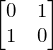

In [11]:
represent(X(0),nqubits=1)  # パウリX

同様に、`Y`, `Z`なども利用することができる。それに加え、アダマール演算 `H` や、位相演算 `S`、そして$\pi/4$の位相演算 `T` も利用することができる（これらもよく出てくる演算で、定義は各行列を見てほしい）：

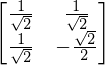

In [12]:
represent(H(0),nqubits=1)

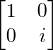

In [13]:
represent(S(0),nqubits=1)

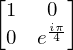

In [14]:
represent(T(0),nqubits=1)

これらの演算を状態に作用させるのは、

In [15]:
S(0)*Y(0)*X(0)*H(0)*ket0

のように `*`で書くことができる。実際に計算をする場合は `qapply()`を利用する。

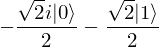

In [16]:
qapply(S(0)*Y(0)*X(0)*H(0)*ket0)

この列ベクトル表示が必要な場合は、

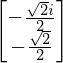

In [17]:
represent(qapply(S(0)*Y(0)*X(0)*H(0)*ket0))

のような感じで、SymPyは簡単な行列の計算はすべて自動的にやってくれる。

---
### コラム：ブラケット記法
ここで一旦、量子力学でよく用いられるブラケット記法というものについて整理しておく。ブラケット記法に慣れると非常に簡単に見通しよく計算を行うことができる。      

列ベクトルは 
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right)
$$
とかくのであった。これを**ケット**と呼ぶ。同様に、行ベクトルは
$$
\langle \psi | = ( |\psi \rangle ) ^{\dagger} = ( \alpha ^* , \beta ^*)
$$
とかき、これを**ブラ**と呼ぶ。${\dagger}$マークは転置と複素共役を取る操作で、列ベクトルを行ベクトルへと移す。

２つのベクトル、
$$
|\psi \rangle = \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right), \;\;\;
|\phi \rangle = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right)
$$
があったとする。ブラとケットを抱き合わせると
$$
\langle \phi | \psi \rangle = (\gamma ^* , \delta ^* ) \left( 
\begin{array}{c}
\alpha
\\
\beta 
\end{array}
\right) = \gamma ^* \alpha + \delta ^* \beta 
$$
となり、**内積**に対応する。行ベクトルと列ベクトルをそれぞれブラ・ケットと呼ぶのは、このように並べて内積を取ると「ブラケット」になるからである。

逆に、背中合わせにすると
$$
|\phi \rangle \langle \psi | = \left( 
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) (\alpha ^* , \beta ^*) = \left( 
\begin{array}{cc}
\gamma \alpha ^*  & \gamma \beta ^* 
\\
\delta \alpha ^*   & \delta \beta ^*
\end{array}
\right)
$$
となり、演算子となる。例えば、$X$演算子は
$$
X= \left( 
\begin{array}{cc}
0 & 1 
\\
1 & 0 
\end{array}
\right)
=
|0\rangle \langle 1 | + |1\rangle \langle 0|
$$
のように書ける。このことを覚えておけば
$$
\langle 0| 0\rangle = \langle 1 | 1\rangle = 1, \;\;\; \langle 0 | 1 \rangle = \langle 1 | 0 \rangle = 0
$$
から 
$$
X |0\rangle = |1\rangle
$$
を行列を書かずに計算できるようになる。   
**量子情報の解析計算においては、実際にベクトルの要素を書き下して計算をすることはほとんどなく、このようにブラケットを使って形式的に書いて計算してしまう場合が多い**（古典計算機上で量子コンピュータをシミュレーションする場合はベクトルをすべて書き下すことになる）。

同様に、
$$
I = |0\rangle \langle 0 | + |1\rangle \langle 1| , \;\;\; Z = |0\rangle \langle 0| - |1\rangle \langle 1| 
$$
も覚えておくと便利である。

---